## Electronic Structure Calculations: The Complete Active Space Self-Consistent Field (CASSCF) Method

In the field of quantum chemistry, the accuracy and efficiency of electronic structure calculations are crucial for understanding complex molecular systems. The Complete Active Space Self-Consistent Field (CASSCF) method stands as a significant advancement in this domain, particularly for systems where electron correlation plays a vital role.

CASSCF is designed to tackle the limitations of simpler methods such as Hartree-Fock (HF), where a single Slater determinant may not sufficiently describe the electronic wavefunction in cases of near-degeneracy or strong correlation. By selecting an "active space" of molecular orbitals and electrons, CASSCF allows for a more flexible and accurate description of the electronic structure.

The key innovation in CASSCF lies in its iterative approach to optimizing both the molecular orbitals and the wavefunction. Unlike HF, which fixes the molecular orbitals, CASSCF iteratively refines them along with the configuration interaction (CI) coefficients within the active space. This results in a more balanced treatment of dynamic and non-dynamic electron correlations, making CASSCF particularly powerful for studying transition states, excited states, and systems with multiple nearly degenerate electronic configurations.

Advantages and Applications

One of the core strengths of CASSCF is its ability to handle systems where conventional single-reference methods fail. This includes cases with significant multi-configurational character, such as diradicals, transition metal complexes, and reaction intermediates. By focusing computational resources on the most chemically relevant part of the system—the active space—CASSCF achieves high accuracy without the need for the full configurational space, which would be computationally prohibitive.

In practice, CASSCF has found extensive application in the study of photochemical processes, where accurate excited state descriptions are essential. Additionally, it is used in the exploration of reaction mechanisms and the electronic properties of complex materials.

Future Directions

As quantum computing continues to evolve, the integration of CASSCF with quantum algorithms holds great promise. Quantum computers could potentially handle the exponential complexity of full configurational interaction calculations, offering an exact solution to electronic structure problems that are currently approximated.

Moreover, advancements in hybrid quantum-classical algorithms are expected to enhance the scalability and efficiency of CASSCF calculations, making them accessible for larger and more complex systems. The future of electronic structure calculations will likely see a blend of classical and quantum methods, pushing the boundaries of what is computationally feasible.

In conclusion, the CASSCF method is a cornerstone of modern quantum chemistry, providing a robust framework for accurately modeling electronic structures in complex systems. As the field progresses, CASSCF will continue to be a vital tool, particularly as it converges with the capabilities of quantum computing.

### Complete Active Space Self-Consistent Field (CASSCF) Method

#### Introduction

The CASSCF method is a powerful computational technique used in quantum chemistry to obtain an accurate electronic wavefunction and corresponding energy for systems with significant electron correlation. The method is particularly useful for systems with near-degenerate electronic states, such as transition states, diradicals, and excited states.

#### Mathematical Formulation

The CASSCF method can be broken down into two primary steps:

1. **Selection of the Active Space:**
   - Choose a set of molecular orbitals to include in the active space. The active space typically consists of a subset of valence orbitals and the corresponding electrons that participate in important chemical interactions.
   - Let $ M $ be the number of orbitals in the active space and $ N $ the number of electrons.

2. **Solving the CASSCF Equations:**
   - The CASSCF method involves solving the electronic Schrödinger equation:
   $$
   \hat{H} \Psi = E \Psi
   $$
   where $ \hat{H} $ is the electronic Hamiltonian, $\Psi $ is the electronic wavefunction, and $ E $ is the energy of the system.
   - The wavefunction $ \Psi $ is represented as a linear combination of configuration state functions (CSFs) within the active space:
   $$
   \Psi = \sum_{i=1}^{N_{CSF}} c_i \Phi_i
   $$
   where $ \Phi_i $ are the CSFs and $ c_i $ are the corresponding CI coefficients. The CI coefficients $ c_i $ are optimized to minimize the energy.

3. **Orbital Optimization:**
   - Simultaneously with the CI coefficients, the molecular orbitals are optimized through a self-consistent field (SCF) procedure. This involves the iterative solution of the following Fock-like equations:
   $$
   \hat{F} \phi_p = \epsilon_p \phi_p
   $$
   where $ \hat{F} $ is the Fock operator, $\phi_p$ are the molecular orbitals, and $ \epsilon_p $ are the orbital energies.

4. **Energy Expression:**
   - The total electronic energy in the CASSCF method is given by:
   $$
   E = \sum_{i} c_i^2 \langle \Phi_i | \hat{H} | \Phi_i \rangle + \sum_{i \neq j} c_i c_j \langle \Phi_i | \hat{H} | \Phi_j \rangle
   $$
   This energy expression includes both the diagonal (one-electron and two-electron integrals) and off-diagonal contributions to the energy from different CSFs.

#### Iterative Procedure

The CASSCF method employs an iterative procedure where the CI coefficients and the molecular orbitals are optimized alternately until convergence is reached. The iterative steps include:

1. **Fix the molecular orbitals and optimize the CI coefficients.**
2. **Fix the CI coefficients and optimize the molecular orbitals.**
3. **Repeat until the energy change between iterations is below a predefined threshold.**

#### Visualization and Interpretation

Once the CASSCF calculations converge, the resulting wavefunction and energy can be used to analyze the electronic structure of the molecule. Visualization tools such as density matrices, natural orbitals, and state populations can provide insights into the chemical behavior of the system. 



In [1]:
from qiskit import  transpile
from qiskit.primitives import Estimator
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import VQE
from scipy.optimize import minimize
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define a simplified Hamiltonian for a two-electron system in an active space
pauli_list = [
    ('II', -1.0),
    ('ZI',  0.4),
    ('IZ', -0.4),
    ('ZZ', -0.1),
    ('XX',  0.2)
]

In [3]:
# Convert to a SparsePauliOp object
hamiltonian = SparsePauliOp.from_list(pauli_list)

In [4]:
# Define the ansatz for the active space
ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz', entanglement='full', reps=2)


In [5]:
# Set up the quantum simulator
simulator =AerSimulator()

In [6]:
# Configure the VQE algorithm
estimator = Estimator()
vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=minimize)

In [7]:
# Run the VQE algorithm
result = vqe.compute_minimum_eigenvalue(operator=hamiltonian)

In [8]:
 # Print the results
print("CASSCF Ground State Energy: ", result.eigenvalue.real)
print("Optimal Parameters: ", result.optimal_parameters)

CASSCF Ground State Energy:  -1.7246211251028905
Optimal Parameters:  {ParameterVectorElement(θ[0]): 3.149355806833761, ParameterVectorElement(θ[1]): 2.964075674083556, ParameterVectorElement(θ[2]): 0.3064512890595387, ParameterVectorElement(θ[3]): 5.133037922176466, ParameterVectorElement(θ[4]): 3.314437152006636, ParameterVectorElement(θ[5]): 5.331678801918678}


In [9]:
# Create the optimal circuit by setting the parameters found by VQE
optimal_circuit = ansatz.assign_parameters(result.optimal_parameters)

In [10]:
# Transpile the circuit for the simulator
transpiled_circuit = transpile(optimal_circuit, simulator)

In [11]:
# Run the circuit on the simulator to get the final statevector
transpiled_circuit.save_statevector()
result = simulator.run(transpiled_circuit).result()
state = result.get_statevector()

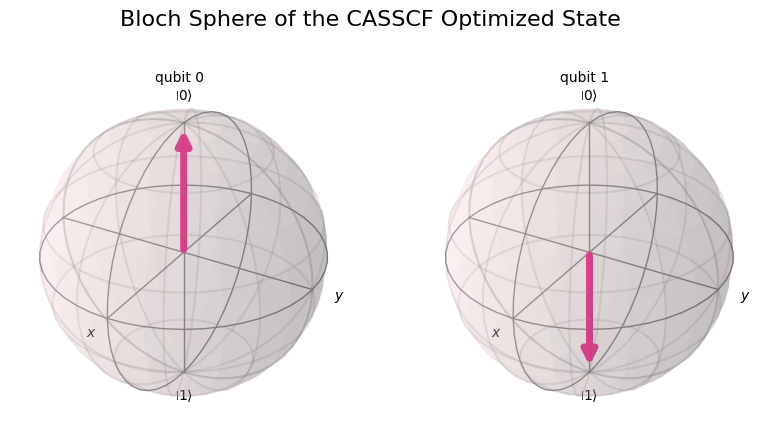

In [12]:
# Plot the Bloch vector for the first qubit
plot_bloch_multivector(state, title="Bloch Sphere of the CASSCF Optimized State").show()

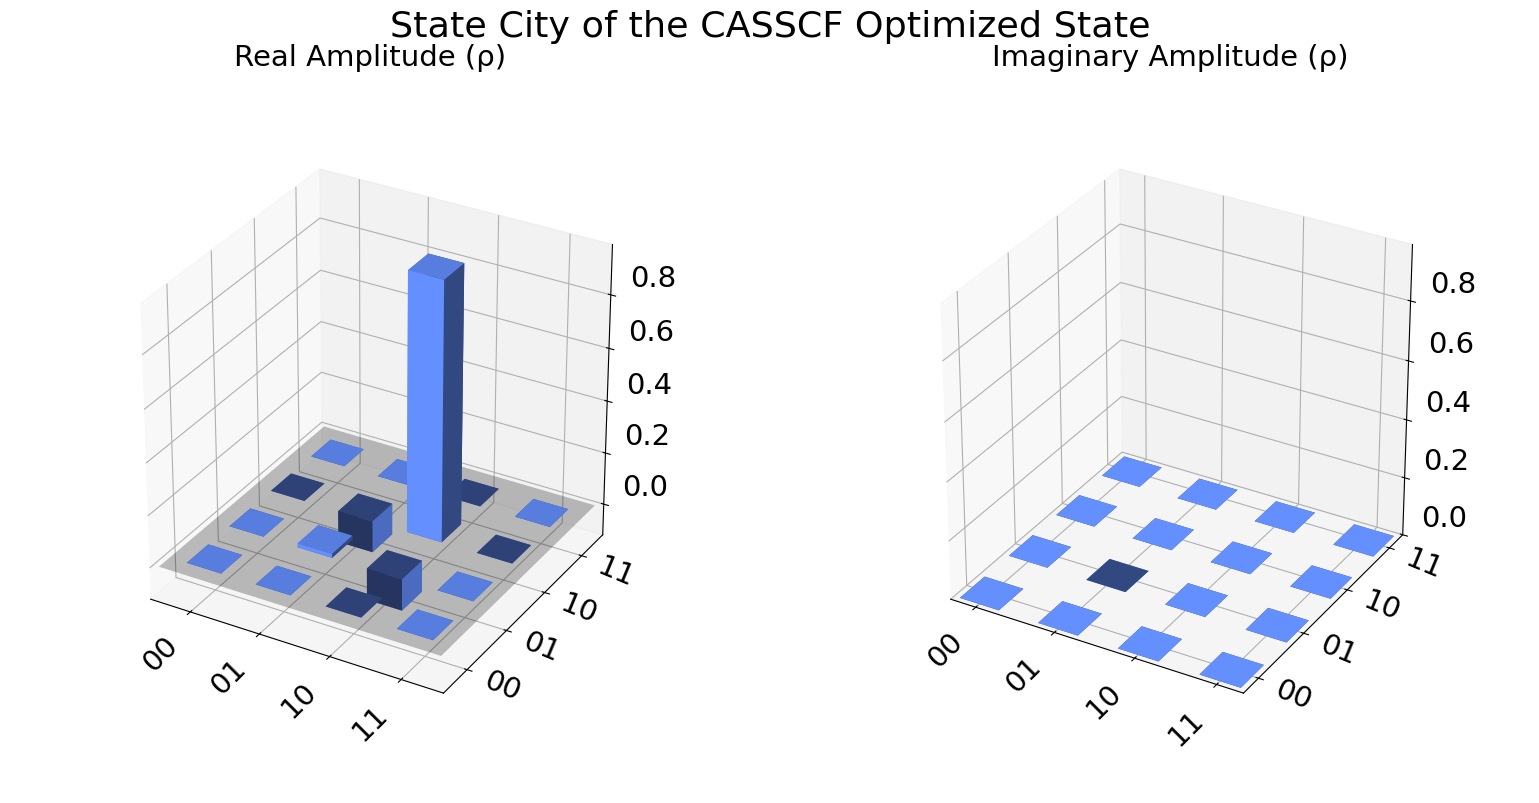

In [13]:
# Plot the state using state_city
plot_state_city(state, title="State City of the CASSCF Optimized State").show()

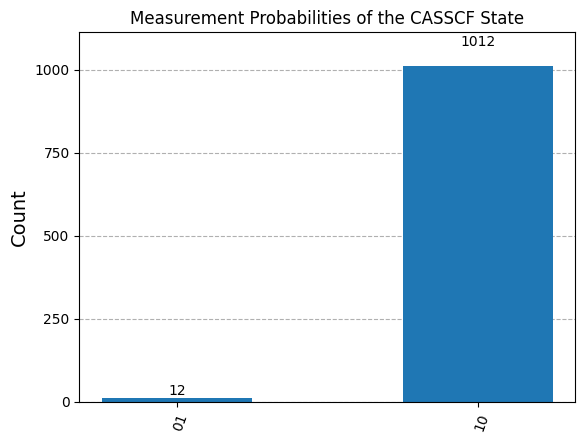

In [14]:
# Calculate and plot the measurement probabilities using a histogram
transpiled_circuit.measure_all()
counts = simulator.run(transpiled_circuit).result().get_counts()
plot_histogram(counts, title="Measurement Probabilities of the CASSCF State").show()